# Pacakages used for analysis

In [169]:
import pandas as pd
import re
import os
import logging
import datetime
import json
import glob
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
#import plotly.plotly as py

import requests
import getpass

In [ ]:
#raw = open("data/date_10_09_01/StreamToS3-5-2017-10-09-01-01-54-58a7111f-767d-47c9-a52b-397b12f91408")

In [ ]:
folders = ['date_10_05_12', 'date_10_06_02', 'date_10_08_12', 'date_10_09_01']
files = []
for folder in folders:
    directory = '/Users/smitaupadhyay/Desktop/data_science01/repogit/247sports-football-sites-leopards/data/' + folder
    for file in os.listdir(directory):
        files.append(directory + '/' + file)
#print(files)


In [ ]:
def text_to_json (filename):
    raw = open(filename)
    txt = raw.read()
    j_txt = re.sub('}{', '},{', txt)
    j_file = "[" + j_txt + "]"
    return j_file

In [ ]:
df = pd.DataFrame()
for file in files:
    j_file = text_to_json(file)
    j_object = json.loads(j_file)
    df = df.append(pd.DataFrame(j_object))

In [ ]:
df.head()
df.shape

In [ ]:
df.head(5)

In [ ]:
from collections import Counter

In [ ]:
Counter(df.referrer)

In [ ]:
len(df.siteKey.unique())

In [ ]:
df.siteKey.unique()

In [ ]:
dict( zip (df['siteKey'], df['referrer']))
Counter(df.siteKey)

In [ ]:
df[df.siteKey == 25690112]
df_tbb = df[df.referrer.str.contains("(tam.247sports.com)", na=False)]
df_tbb.head(5)

In [ ]:
df_ind = df[df.referrer.str.contains("(ind.247sports.com)", na=False)]
df_ind.referrer.unique()
df_ind

In [ ]:
#df_jj = df[df.referrer.str.contains("(Jaguars)", na=False)] #jax.247sports.com #24772608
df_jj = df[df.referrer.str.contains("(jax.247sports.com)", na=False)]
df_jj.referrer.unique()
df_jj

In [ ]:
df_lsc = df[df.siteKey == 25296896]
#df_lsc = df[df.referrer.str.contains("(ind.247sports.com)", na=False)]
df_lsc.referrer.unique()

In [ ]:
df_lsc1 = df[df.referrer.str.contains("(lac.247sports.com)", na=False)]
df_lsc1.referrer.unique()
#df_lsc1

In [ ]:
BASE_URL = "https://9n52ntmq97.execute-api.us-east-1.amazonaws.com/prod"
REQUEST_URL = "{base_url}/guess".format(base_url=BASE_URL)
WRONG = {
    "Arizona Cardinals": 23724032,
    "Atlanta Falcons": 23789568,
    "Baltimore Ravens": 23855104,
    "Buffalo Bills": 23920640,
    "Carolina Panthers": 23986176,
    "Chicago Bears": 24051712,
    "Cincinnati Bengals": 24117248,
    "Cleveland Browns": 24182784,
    "Dallas Cowboys": 24248320,
    "Denver Broncos": 24313856,
    "Detroit Lions": 24379392,
    "Green Bay Packers": 24444928,
    "Houston Texans": 24510464,
    "Indianapolis Colts": 24576000,
    "Jacksonville Jaguars": 24641536,
    "Kansas City Chiefs": 24707072,
    "Los Angeles Chargers": 25296896,
    "Los Angeles Rams": 25427968,
    "Miami Dolphins": 24772608,
    "Minnesota Vikings": 24838144,
    "New England Patriots": 24903680,
    "New Orleans Saints": 25624576,
    "New York Giants": 24969216,
    "New York Jets": 25034752,
    "Oakland Raiders": 25100288,
    "Philadelphia Eagles": 25165824,
    "Pittsburgh Steelers": 25231360,
    "San Francisco 49ers": 25362432,
    "Seattle Seahawks": 2490368,
    "Tampa Bay Buccaneers": 25690112,
    "Tennessee Titans": 2097152,
    "Washington Redskins": 25493504,
}


def submit_request(guess, username):
    print("Submitting guess!")
    resp = requests.post(REQUEST_URL, json={
        "results": guess,
        "username": username
    })
    print(resp.text)


if __name__ == '__main__':
    print("Submitting guess for {} teams".format(len(WRONG)))
    submit_request(WRONG, getpass.getuser())

In [ ]:
df.head(2)

In [ ]:
counter_siteKey = Counter(df.siteKey)
counter_siteKey

In [ ]:
#plt.hist(df.siteKey)

In [ ]:
siteKey = counter_siteKey.most_common(32)
siteKey

In [ ]:
df_countsiteKey = pd.DataFrame(siteKey)
df_countsiteKey

In [ ]:
df_countsiteKey.rename(
  columns={
    0 : 'siteKey',
    1 : 'siteKey_occurence'
     },
  inplace=True
)
df_countsiteKey

In [154]:
df_countsiteKey.rename(
  columns={
    'SiteKey' : 'Sitekey'
         },
  inplace=True
)
df_countsiteKey

,Sitekey,siteKey_occurence
0,24248320,135741
1,24444928,116701
2,24903680,103971
3,25231360,96597
4,25100288,61310
5,25165824,48531
6,24969216,43923
7,2490368,43643
8,24313856,28549
9,23986176,23902


In [ ]:
dictname_sitekey = {"Arizona Cardinals": 23724032,
    "Atlanta Falcons": 23789568,
    "Baltimore Ravens": 23855104,
    "Buffalo Bills": 23920640,
    "Carolina Panthers": 23986176,
    "Chicago Bears": 24051712,
    "Cincinnati Bengals": 24117248,
    "Cleveland Browns": 24182784,
    "Dallas Cowboys": 24248320,
    "Denver Broncos": 24313856,
    "Detroit Lions": 24379392,
    "Green Bay Packers": 24444928,
    "Houston Texans": 24510464,
    "Indianapolis Colts": 24576000,
    "Jacksonville Jaguars": 24641536,
    "Kansas City Chiefs": 24707072,
    "Los Angeles Chargers": 25296896,
    "Los Angeles Rams": 25427968,
    "Miami Dolphins": 24772608,
    "Minnesota Vikings": 24838144,
    "New England Patriots": 24903680,
    "New Orleans Saints": 25624576,
    "New York Giants": 24969216,
    "New York Jets": 25034752,
    "Oakland Raiders": 25100288,
    "Philadelphia Eagles": 25165824,
    "Pittsburgh Steelers": 25231360,
    "San Francisco 49ers": 25362432,
    "Seattle Seahawks": 2490368,
    "Tampa Bay Buccaneers": 25690112,
    "Tennessee Titans": 2097152,
    "Washington Redskins": 25493504}

In [ ]:
print(dictname_sitekey)

In [151]:
df2= pd.DataFrame()
df2['Name'] = dictname_sitekey.keys()
df2['Sitekey'] = dictname_sitekey.values()
df2

,Name,Sitekey
0,Arizona Cardinals,23724032
1,Atlanta Falcons,23789568
2,Baltimore Ravens,23855104
3,Buffalo Bills,23920640
4,Carolina Panthers,23986176
5,Chicago Bears,24051712
6,Cincinnati Bengals,24117248
7,Cleveland Browns,24182784
8,Dallas Cowboys,24248320
9,Denver Broncos,24313856


In [155]:
merged_sitekey = pd.merge(df2, df_countsiteKey, on=['Sitekey'])
merged_sitekey

,Name,Sitekey,siteKey_occurence
0,Arizona Cardinals,23724032,682
1,Atlanta Falcons,23789568,7289
2,Baltimore Ravens,23855104,1976
3,Buffalo Bills,23920640,2782
4,Carolina Panthers,23986176,23902
5,Chicago Bears,24051712,16189
6,Cincinnati Bengals,24117248,3827
7,Cleveland Browns,24182784,9958
8,Dallas Cowboys,24248320,135741
9,Denver Broncos,24313856,28549


<BarContainer object of 32 artists>

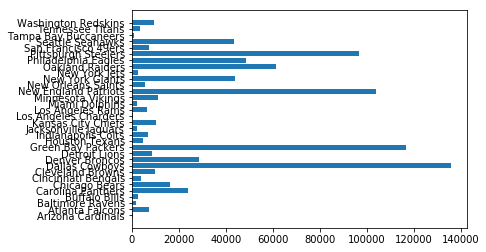

In [170]:
plt.barh(merged_sitekey.Name, merged_sitekey.siteKey_occurence)
plt.ylabel()



In [ ]:
count_ref = Counter(df.referrer)
count_ref

In [ ]:
count_ref.most_common(10)

In [ ]:
len(count_ref)

In [ ]:
count_userId = Counter(df.userId) #(828180, 10)
len(count_userId)

In [ ]:
count_userId.most_common(10)

In [ ]:
top_user = df[df.userId == '4971b229-6ca1-446c-916a-55d07eb27e98']
top_user.siteKey.unique()

In [ ]:
count_userAgent = Counter(df.userAgent) #(828180, 10)
len(count_userAgent)

In [ ]:
count_userAgent.most_common(10)